In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

# Own modules
import load_cifar10
import experiments

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
train_dataset, val_dataset, test_dataset = load_cifar10.load_and_create_loaders('../CIFAR-10', return_ds=True)

Data loaded succesfully! as <class 'torch.Tensor'>
Training data shape: torch.Size([40000, 3, 32, 32])


In [3]:
# Set architecture
input_size = 32 * 32 * 3  # 3072 features per image
hidden_layers = [1000, 1000] 
num_classes = 10  # CIFAR-10 has 10 classes
lr = 0.001

# Create dict to pass to experiments
architecture = {
    'input_size': input_size,
    'hlayers_size': hidden_layers,
    'lr': lr,
    'num_classes': num_classes
}

In [4]:
experiment = experiments.Experiment(architecture=architecture, train_strategy='ES')

In [5]:
train_results, val_results = experiment.generate_learning_curve(train_dataset=train_dataset, val_dataset=val_dataset, batch_size=32, metric='loss', verbose=True)


Training with 10 samples...

Training with 15 samples...

Training with 23 samples...

Training with 37 samples...

Training with 57 samples...

Training with 88 samples...

Training with 137 samples...

Training with 212 samples...

Training with 328 samples...

Training with 508 samples...

Training with 786 samples...

Training with 1217 samples...

Training with 1883 samples...

Training with 2914 samples...

Training with 4509 samples...

Training with 6978 samples...

Training with 10797 samples...

Training with 16706 samples...

Training with 25851 samples...

Training with 40000 samples...


In [9]:
val_results

[30.397339630126954,
 30.864401525878908,
 17.36181947631836,
 8.044703010559083,
 11.186753276062012,
 6.9144917037963864,
 6.500480656433106,
 6.088235258483887,
 5.592107534790039,
 6.0240387451171875,
 5.172578789520264,
 5.242801735687256,
 5.238870753479004,
 4.7047827968597415,
 4.621927410125733,
 3.645551508331299,
 3.504027201271057,
 3.132901847076416,
 2.402778286743164,
 1.9496902688980102]

In [14]:
full_train_size = len(train_dataset)
DATASET_SIZES = 20
training_sizes = np.logspace(1, np.log10(full_train_size), DATASET_SIZES, dtype=int)

<Axes: >

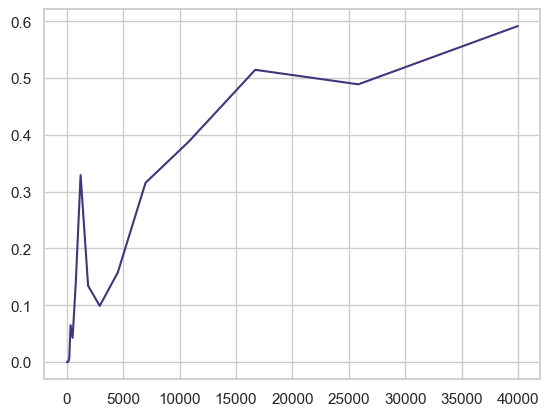

In [23]:
# Set style
sns.set_theme(style="whitegrid", palette="viridis")
colors = sns.color_palette("magma", 2)
plt.figure()
sns.lineplot(x=training_sizes, y=train_results)

# Comments
It seems to work as intended.  
TODO:   
- Test replicability because of the seeds. 
- ! Test how the fuck to integrate both the LC and the other metrics
- Think about how to export and handle this pieces of art.

# Break it

In [2]:
train_dataset, val_dataset, test_dataset = load_cifar10.load_and_create_loaders('../CIFAR-10', return_ds=True)

# Set architecture
input_size = 32 * 32 * 3  # 3072 features per image
hidden_layers = [1000, 1000] 
num_classes = 10  # CIFAR-10 has 10 classes
lr = 0.001

# Set other HP
random_seed = 13
batch_size = 32

# Create dict to pass to experiments
architecture = {
    'input_size': input_size,
    'hlayers_size': hidden_layers,
    'lr': lr,
    'num_classes': num_classes
}

Data loaded succesfully! as <class 'torch.Tensor'>
Training data shape: torch.Size([40000, 3, 32, 32])


In [ ]:
# My first experiment
experiment = experiments.Experiment(architecture=architecture, 
                                    train_strategy='OE', 
                                    random_seed=random_seed)
results = experiment.full_experiment(train_dataset=train_dataset,
                                     val_dataset=val_dataset, 
                                     test_dataset=test_dataset,
                                     batch_size=batch_size)

# Create a DataFrame with the results
string_values = {key: str(value) for key, value in results.items()}
df = pd.DataFrame([string_values])

display(df)

,ID,n_layers,neurons_per_layer,learning_rate,train_loss,train_accuracy,val_loss,val_accuracy,test_loss,test_accuracy,train_val_time,LC_Train,LC_Validation,Strategy,Seed,Batch Size
0,"2_[1000, 1000]_0.001",2,"[1000, 1000]",0.001,1.5859288058280945,0.426075,1.6457862573623656,0.4033,1.6383095226287843,0.4103,3.4999725818634033,"[1.5081572532653809, 0.9250859022140503, 1.049...","[1.6516873474121094, 1.6597106161117554, 1.668...",OE,13,32


In [9]:
# My SECOND experiment
experiment = experiments.Experiment(architecture=architecture, 
                                    train_strategy='ES', 
                                    random_seed=random_seed)
results = experiment.full_experiment(train_dataset=train_dataset,
                                     val_dataset=val_dataset, 
                                     test_dataset=test_dataset,
                                     batch_size=batch_size)

# Create a DataFrame with the results
string_values = {key: str(value) for key, value in results.items()}
df = pd.DataFrame([string_values])

display(df)

,ID,n_layers,neurons_per_layer,learning_rate,train_loss,train_accuracy,val_loss,val_accuracy,test_loss,test_accuracy,train_val_time,LC_Train,LC_Validation,Strategy,Seed,Batch Size
0,"2_[1000, 1000]_0.001",2,"[1000, 1000]",0.001,0.5614279808044433,0.800925,1.9600209506988526,0.5184,2.042952799606323,0.5144,85.83394813537598,"[0.0007674006628803909, 0.19600678980350494, 0...","[2.1473799964904785, 2.657403028678894, 3.0333...",ES,13,32


What about Splits(?)